# Lab | Customer Analysis Round 6

For this lab, we still keep using the marketing_customer_analysis.csv file that you can find in the files_for_lab folder.

## Get the data

We are using the marketing_customer_analysis.csv file.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None

In [6]:
df = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')
df = df.drop_duplicates()
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


## Dealing with the data

Already done in the round 2.

## Explore the data

Done in the round 3.

In [7]:
df.columns = [column.lower().replace(' ', '_') for column in df.columns]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

In [8]:
# customer is the id, unique, so I passed it as the index
df = df.set_index('customer')
df.head()

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [11]:
# check my categories in each categorical column

cat = df.select_dtypes('object')
cat

,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize


In [12]:
for column in cat.columns:
    print(column, cat[column].unique())

state ['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
response ['No' 'Yes']
coverage ['Basic' 'Extended' 'Premium']
education ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
effective_to_date ['2/24/11' '1/31/11' '2/19/11' '1/20/11' '2/3/11' '1/25/11' '1/18/11'
 '1/26/11' '2/17/11' '2/21/11' '1/6/11' '2/6/11' '1/10/11' '1/17/11'
 '1/5/11' '2/27/11' '1/14/11' '1/21/11' '2/5/11' '1/29/11' '2/28/11'
 '2/12/11' '2/2/11' '2/7/11' '1/22/11' '2/13/11' '1/15/11' '1/8/11'
 '1/11/11' '1/28/11' '2/8/11' '2/23/11' '1/2/11' '2/16/11' '1/27/11'
 '1/23/11' '1/9/11' '2/11/11' '2/4/11' '2/1/11' '2/15/11' '2/26/11'
 '1/16/11' '1/1/11' '2/10/11' '1/24/11' '2/25/11' '1/12/11' '2/9/11'
 '1/19/11' '1/4/11' '2/14/11' '2/20/11' '2/18/11' '1/3/11' '1/13/11'
 '1/30/11' '2/22/11' '1/7/11']
employmentstatus ['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
gender ['F' 'M']
location_code ['Suburban' 'Rural' 'Urban']
marital_status ['Married' 'Single' 'Divorced']
policy_type ['C

In [ ]:
# I decided to change data type of 'effective_to_date' to datetime datatype
# I also decided to replace 'vehicle_size' columns into numerical

In [14]:
df['effective_to_date'] = pd.to_datetime(df['effective_to_date'])
df['effective_to_date']

customer
BU79786   2011-02-24
QZ44356   2011-01-31
AI49188   2011-02-19
WW63253   2011-01-20
HB64268   2011-02-03
             ...    
LA72316   2011-02-10
PK87824   2011-02-12
TD14365   2011-02-06
UP19263   2011-02-03
Y167826   2011-02-14
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]

In [15]:
df["vehicle_size"].value_counts()

Medsize    6424
Small      1764
Large       946
Name: vehicle_size, dtype: int64

In [23]:
df["vehicle_size"].replace({"Small": "1", "Medsize": "2", "Large": "3"}, inplace=True)
df["vehicle_size"] = pd.to_numeric(df["vehicle_size"])

df["vehicle_size"].value_counts()

2    6424
1    1764
3     946
Name: vehicle_size, dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9134 entries, BU79786 to Y167826
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   state                          9134 non-null   object        
 1   customer_lifetime_value        9134 non-null   float64       
 2   response                       9134 non-null   object        
 3   coverage                       9134 non-null   object        
 4   education                      9134 non-null   object        
 5   effective_to_date              9134 non-null   datetime64[ns]
 6   employmentstatus               9134 non-null   object        
 7   gender                         9134 non-null   object        
 8   income                         9134 non-null   int64         
 9   location_code                  9134 non-null   object        
 10  marital_status                 9134 non-null   object        
 11  monthly_premi

In [25]:
# check my categories in each numerical column

df.describe().apply(lambda x: round(x,2))

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,vehicle_size
count,9134.00,9134.00,9134.00,9134.00,9134.00,9134.00,9134.00,9134.00,9134.00
mean,8004.94,37657.38,93.22,15.10,48.06,0.38,2.97,434.09,1.91
std,6870.97,30379.90,34.41,10.07,27.91,0.91,2.39,290.50,0.54
min,1898.01,0.00,61.00,0.00,0.00,0.00,1.00,0.10,1.00
25%,3994.25,0.00,68.00,6.00,24.00,0.00,1.00,272.26,2.00
50%,5780.18,33889.50,83.00,14.00,48.00,0.00,2.00,383.95,2.00
75%,8962.17,62320.00,109.00,23.00,71.00,0.00,4.00,547.51,2.00
max,83325.38,99981.00,298.00,35.00,99.00,5.00,9.00,2893.24,3.00


In [26]:
df.select_dtypes(np.number)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,vehicle_size
customer,,,,,,,,,
BU79786,2763.519279,56274,69,32,5,0,1,384.811147,2
QZ44356,6979.535903,0,94,13,42,0,8,1131.464935,2
AI49188,12887.431650,48767,108,18,38,0,2,566.472247,2
WW63253,7645.861827,0,106,18,65,0,7,529.881344,2
HB64268,2813.692575,43836,73,12,44,0,1,138.130879,2
...,...,...,...,...,...,...,...,...,...
LA72316,23405.987980,71941,73,18,89,0,2,198.234764,2
PK87824,3096.511217,21604,79,14,28,0,1,379.200000,2
TD14365,8163.890428,0,85,9,37,3,2,790.784983,2


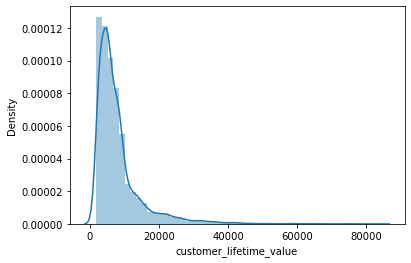

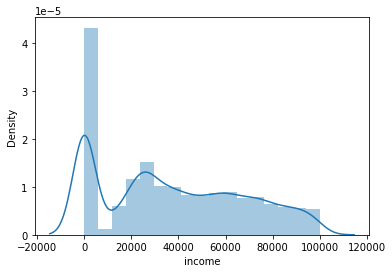

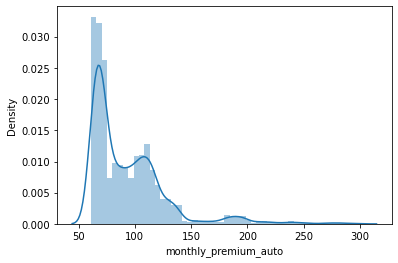

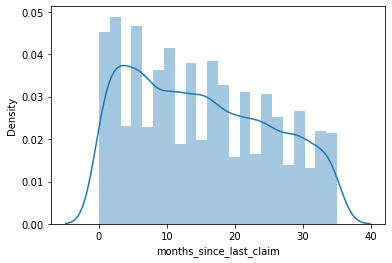

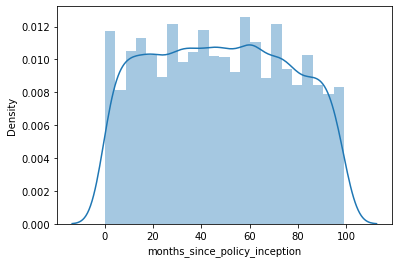

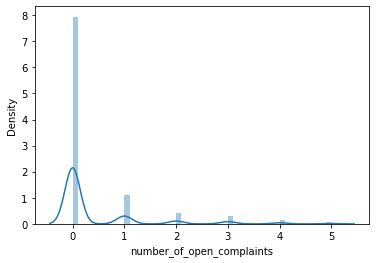

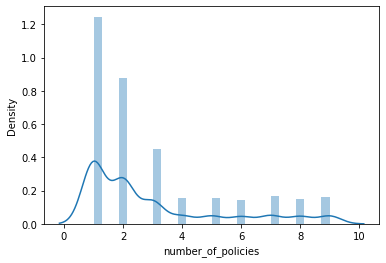

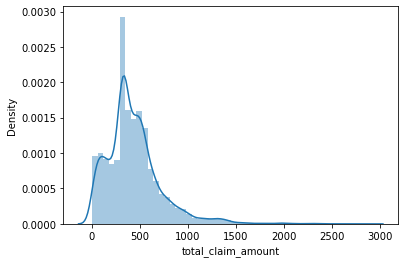

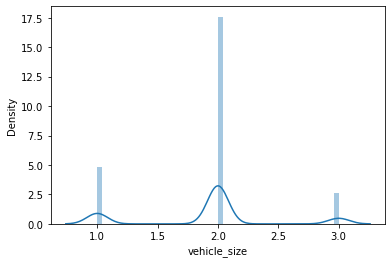

In [27]:
for column in df.select_dtypes(np.number).columns:
    sns.distplot(df[column])
    plt.show()

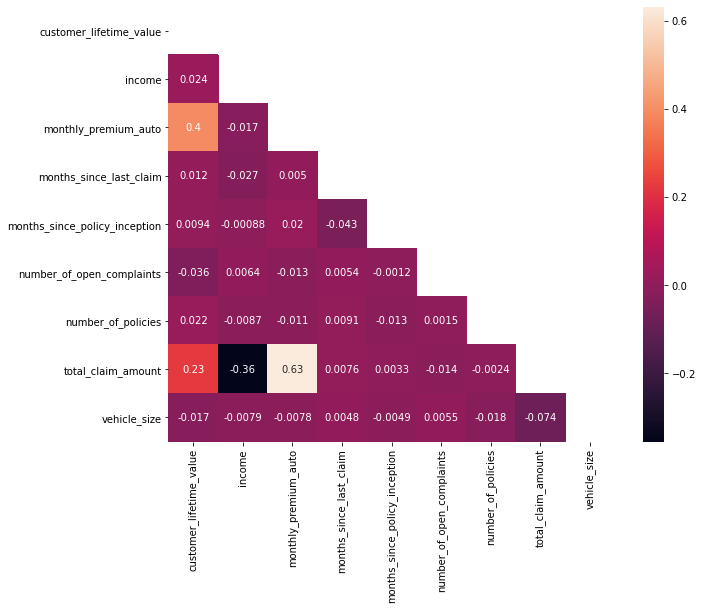

In [28]:
# check the correlations
mask = np.zeros_like(df.corr())

mask[np.triu_indices_from(mask)] = True 

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(df.corr(), mask=mask, annot=True)
plt.show()

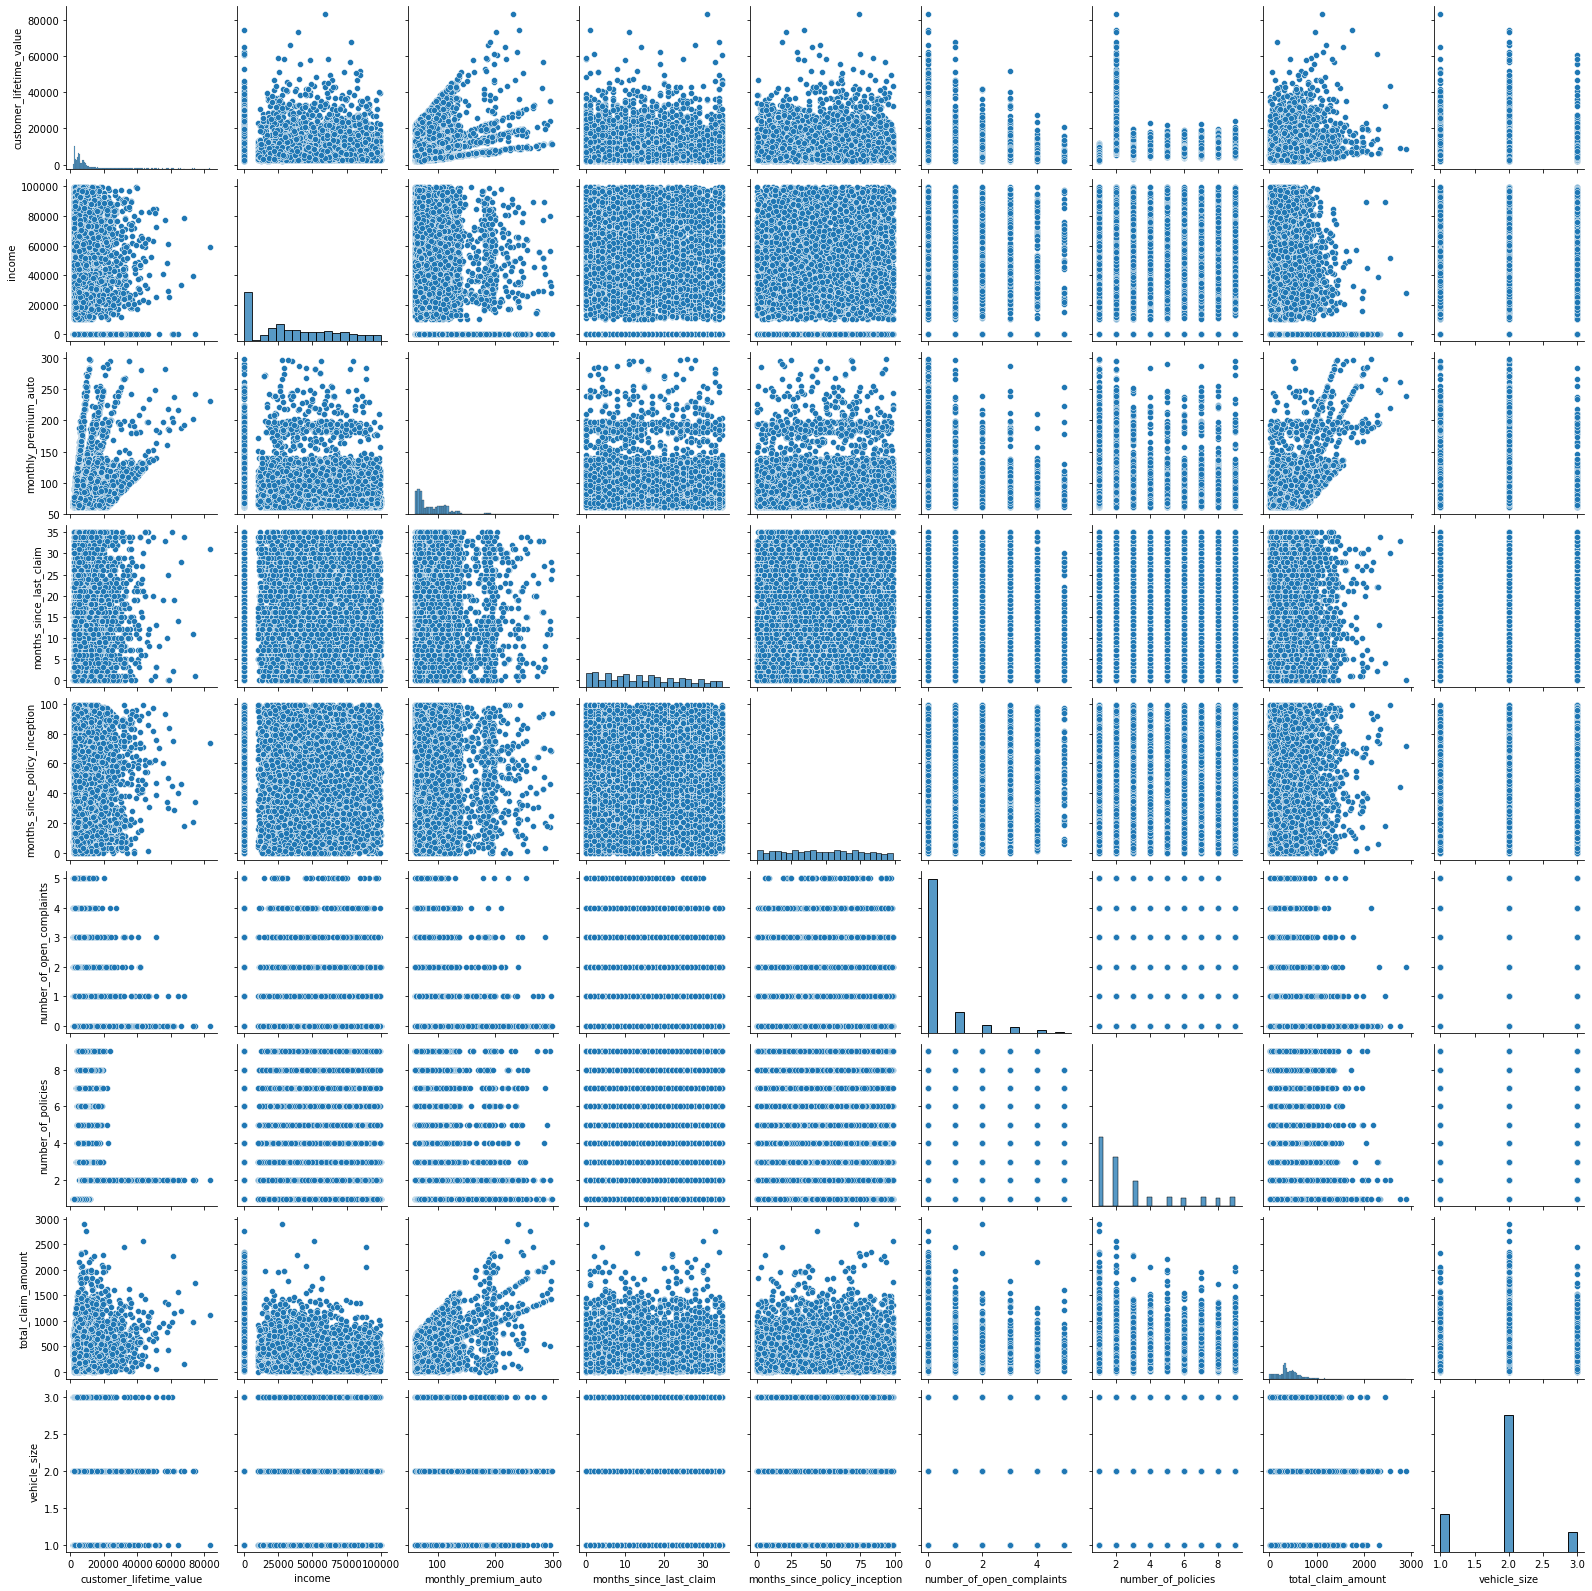

In [29]:
# covariance visualization
sns.pairplot(df)

## Processing Data

(Further processing...)

- X-y split. (done)
- Normalize (numerical). (done)
- One Hot/Label Encoding (categorical).
- Concat DataFrames

**X-Y Split** If you have not done it, you have you take in count that the target will be `total_claim_amount`

In [105]:
# splitting our data

X = df.drop('total_claim_amount', axis=1)
y = df['total_claim_amount']

In [106]:
# splitting X into number and object
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = object)

**Normalize (numerical)** If you have not done it yet, you can define a function using `StandardScaler`from sklearn library

In [107]:
from sklearn.preprocessing import StandardScaler

transformer = StandardScaler().fit(X_num)
x_standardized = transformer.transform(X_num)

X_num1=pd.DataFrame(x_standardized)
X_num1.columns = X_num.columns
X_num1

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,vehicle_size
0,-0.762878,0.612827,-0.703925,1.678099,-1.543287,-0.422250,-0.822648,0.166682
1,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,-0.422250,2.106160,0.166682
2,0.710636,0.365710,0.429596,0.288205,-0.360680,-0.422250,-0.404247,0.166682
3,-0.052263,-1.239617,0.371467,0.288205,0.606907,-0.422250,1.687759,0.166682
4,-0.755575,0.203390,-0.587666,-0.307465,-0.145661,-0.422250,-0.822648,0.166682
...,...,...,...,...,...,...,...,...
9129,2.241590,1.128558,-0.587666,0.288205,1.466984,-0.422250,-0.404247,0.166682
9130,-0.714411,-0.528450,-0.413278,-0.108908,-0.719046,-0.422250,-0.822648,0.166682
9131,0.023135,-1.239617,-0.238891,-0.605299,-0.396517,2.873245,-0.404247,0.166682
9132,-0.069935,-0.517356,0.080820,1.876656,-1.614960,-0.422250,0.014154,2.027897


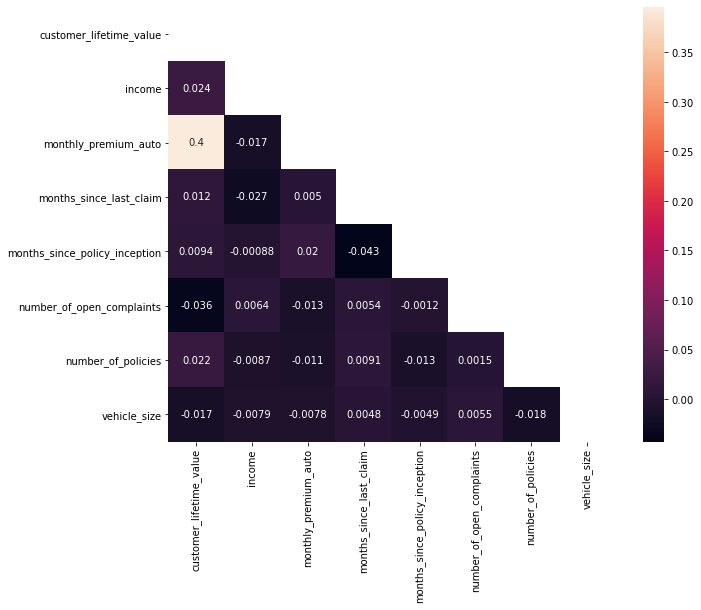

In [108]:
mask = np.zeros_like(X_num1.corr())

mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(X_num1.corr(), mask=mask, annot=True)
plt.show()


**One Hot/Label Encoding (categorical)** Try one of the two options learned in class

In [109]:
for column in X_cat.columns:
    print(column, X_cat[column].unique())

state ['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
response ['No' 'Yes']
coverage ['Basic' 'Extended' 'Premium']
education ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
employmentstatus ['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
gender ['F' 'M']
location_code ['Suburban' 'Rural' 'Urban']
marital_status ['Married' 'Single' 'Divorced']
policy_type ['Corporate Auto' 'Personal Auto' 'Special Auto']
policy ['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2'
 'Corporate L1' 'Personal L2' 'Special L1' 'Special L3']
renew_offer_type ['Offer1' 'Offer3' 'Offer2' 'Offer4']
sales_channel ['Agent' 'Call Center' 'Web' 'Branch']
vehicle_class ['Two-Door Car' 'Four-Door Car' 'SUV' 'Luxury SUV' 'Sports Car'
 'Luxury Car']


In [110]:
# drop 'policy' column because it is too detailed data
X_cat.drop('policy', inplace=True, axis=1)

In [111]:
X_cat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9134 entries, BU79786 to Y167826
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   state             9134 non-null   object
 1   response          9134 non-null   object
 2   coverage          9134 non-null   object
 3   education         9134 non-null   object
 4   employmentstatus  9134 non-null   object
 5   gender            9134 non-null   object
 6   location_code     9134 non-null   object
 7   marital_status    9134 non-null   object
 8   policy_type       9134 non-null   object
 9   renew_offer_type  9134 non-null   object
 10  sales_channel     9134 non-null   object
 11  vehicle_class     9134 non-null   object
dtypes: object(12)
memory usage: 1.2+ MB


In [112]:
cat_data = pd.get_dummies(X_cat, drop_first=True)
cat_data

,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,education_College,education_Doctor,education_High School or Below,education_Master,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,employmentstatus_Unemployed,gender_M,location_code_Suburban,location_code_Urban,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car
customer,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BU79786,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
QZ44356,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0
AI49188,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1
WW63253,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
HB64268,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA72316,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0
PK87824,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
TD14365,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


**Concat DataFrames**

In [113]:
X_num1.shape, cat_data.shape

((9134, 8), (9134, 33))

In [114]:
X = np.concatenate([X_num1, cat_data], axis=1)
X

array([[-0.76287773,  0.61282744, -0.70392465, ...,  0.        ,
         0.        ,  1.        ],
       [-0.14924546, -1.23961684,  0.02269103, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.71063622,  0.36570978,  0.42959581, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.02313483, -1.23961684, -0.23889062, ...,  0.        ,
         0.        ,  0.        ],
       [-0.06993547, -0.51735647,  0.08082028, ...,  0.        ,
         0.        ,  0.        ],
       [-0.78495478, -1.23961684, -0.47140763, ...,  0.        ,
         0.        ,  1.        ]])

## Linear Regression

- Train-test split.
- Apply linear regression.

**Train-test split** Divide your data in a train part and a test part

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

**Apply linear regression** For this question you can use `statsmodels` or `sklearn` libraries

In [116]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Model Validation

- Description:
R2.
MSE.
RMSE.
MAE.

**Get R2 from the model**

In [117]:
import math

predictions = model.predict(X_test)

In [118]:
r2 = r2_score(y_test, predictions)
print(r2)

0.7673606172015466


**Get MSE from the model**

In [119]:
mse = mean_squared_error(y_test, predictions)
print(mse)

18874.663301639896


**Get RMSE from the model**

In [120]:
rmse = math.sqrt(mse)
print(rmse)

137.3850912640811


**Get MAE from the model**

In [121]:
mae = mean_absolute_error(y_test, predictions)
print(mae)

93.26201910784334
